<a href="https://colab.research.google.com/github/fhallatu/2_version-control-and-branch-management-git/blob/main/Soyaland_ABC_CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize

from IPython.display import Image, display

import graphviz

import matplotlib.pyplot as plt
import matplotlib.image as pltimg

import pydotplus

from scipy import interp
from itertools import cycle

import random

In [3]:
path_dataset = "/content/drive/MyDrive/Data_Used/data lahan.csv"
df = pd.read_csv(path_dataset, sep=',')
df.head()

,Unnamed: 0,Mapping Unit,No.,Kecamatan,Kabupaten,Provinsi,temperatur_rerata,curah_hujan,kelembaban,bulan_basah,...,ktk_tanah,kejenuhan_basa,ph_h2o,c_organik,n_total,p2o5,k2o,lereng,bahaya_erosi,label_evaluasi
0,0,1,1,Talang Empat,Bengkulu Tengah,Bengkulu,26.07,3025,83.51,7,...,61.09,53.11,5.42,1.25,2,1,1,3,1,N
1,1,1,2,Pondok Kelapa,Bengkulu Tengah,Bengkulu,26.07,2655,83.51,7,...,61.09,53.11,5.42,1.25,2,1,1,3,1,N
2,2,2,3,Talang Empat,Bengkulu Tengah,Bengkulu,26.23,3025,83.51,7,...,61.09,53.11,5.42,1.25,2,1,1,1,1,N
3,3,2,4,Pondok Kelapa,Bengkulu Tengah,Bengkulu,26.23,2655,83.51,7,...,61.09,53.11,5.42,1.25,2,1,1,1,1,N
4,4,3,5,Pematang Tiga,Bengkulu Tengah,Bengkulu,25.77,2655,83.51,7,...,61.09,53.11,5.42,1.25,2,1,1,3,1,N


# **Import Data**

# **Data Preparation**

## **Drop Column**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         247 non-null    int64  
 1   Mapping Unit       247 non-null    int64  
 2   No.                247 non-null    int64  
 3   Kecamatan          247 non-null    object 
 4   Kabupaten          247 non-null    object 
 5   Provinsi           247 non-null    object 
 6   temperatur_rerata  247 non-null    float64
 7   curah_hujan        247 non-null    int64  
 8   kelembaban         247 non-null    float64
 9   bulan_basah        247 non-null    int64  
 10  drainase           247 non-null    int64  
 11  tekstur            247 non-null    int64  
 12  kedalaman_tanah    247 non-null    int64  
 13  ktk_tanah          247 non-null    float64
 14  kejenuhan_basa     247 non-null    float64
 15  ph_h2o             247 non-null    float64
 16  c_organik          247 non

In [5]:
df.drop(["Unnamed: 0","Mapping Unit","No.","Kecamatan","Kabupaten","Provinsi"], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperatur_rerata  247 non-null    float64
 1   curah_hujan        247 non-null    int64  
 2   kelembaban         247 non-null    float64
 3   bulan_basah        247 non-null    int64  
 4   drainase           247 non-null    int64  
 5   tekstur            247 non-null    int64  
 6   kedalaman_tanah    247 non-null    int64  
 7   ktk_tanah          247 non-null    float64
 8   kejenuhan_basa     247 non-null    float64
 9   ph_h2o             247 non-null    float64
 10  c_organik          247 non-null    float64
 11  n_total            247 non-null    int64  
 12  p2o5               247 non-null    int64  
 13  k2o                247 non-null    int64  
 14  lereng             247 non-null    int64  
 15  bahaya_erosi       247 non-null    int64  
 16  label_evaluasi     247 non

## **Data Cleaning**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperatur_rerata  247 non-null    float64
 1   curah_hujan        247 non-null    int64  
 2   kelembaban         247 non-null    float64
 3   bulan_basah        247 non-null    int64  
 4   drainase           247 non-null    int64  
 5   tekstur            247 non-null    int64  
 6   kedalaman_tanah    247 non-null    int64  
 7   ktk_tanah          247 non-null    float64
 8   kejenuhan_basa     247 non-null    float64
 9   ph_h2o             247 non-null    float64
 10  c_organik          247 non-null    float64
 11  n_total            247 non-null    int64  
 12  p2o5               247 non-null    int64  
 13  k2o                247 non-null    int64  
 14  lereng             247 non-null    int64  
 15  bahaya_erosi       247 non-null    int64  
 16  label_evaluasi     247 non

In [8]:
df.isna().sum()

temperatur_rerata    0
curah_hujan          0
kelembaban           0
bulan_basah          0
drainase             0
tekstur              0
kedalaman_tanah      0
ktk_tanah            0
kejenuhan_basa       0
ph_h2o               0
c_organik            0
n_total              0
p2o5                 0
k2o                  0
lereng               0
bahaya_erosi         0
label_evaluasi       0
dtype: int64

In [9]:
df.to_csv('lahan.csv')

In [10]:
df = pd.read_csv('lahan.csv')
df

,Unnamed: 0,temperatur_rerata,curah_hujan,kelembaban,bulan_basah,drainase,tekstur,kedalaman_tanah,ktk_tanah,kejenuhan_basa,ph_h2o,c_organik,n_total,p2o5,k2o,lereng,bahaya_erosi,label_evaluasi
0,0,26.07,3025,83.51,7,2,1,100,61.09,53.11,5.42,1.25,2,1,1,3,1,N
1,1,26.07,2655,83.51,7,2,1,100,61.09,53.11,5.42,1.25,2,1,1,3,1,N
2,2,26.23,3025,83.51,7,2,1,100,61.09,53.11,5.42,1.25,2,1,1,1,1,N
3,3,26.23,2655,83.51,7,2,1,100,61.09,53.11,5.42,1.25,2,1,1,1,1,N
4,4,25.77,2655,83.51,7,2,2,100,61.09,53.11,5.42,1.25,2,1,1,3,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,242,22.44,1625,68.50,7,5,1,120,25.41,23.69,5.14,0.00,2,1,1,41,4,N
243,243,22.44,2772,68.50,7,5,1,120,25.41,23.69,5.14,0.00,2,1,1,41,4,N
244,244,22.44,2586,68.50,7,5,1,120,25.41,23.69,5.14,0.00,2,1,1,41,4,N
245,245,17.75,2708,68.50,7,5,1,120,0.00,0.00,5.72,3.30,1,2,1,40,3,N


## **Split Data**

### **Variable Independent & Variable Dependent**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         247 non-null    int64  
 1   temperatur_rerata  247 non-null    float64
 2   curah_hujan        247 non-null    int64  
 3   kelembaban         247 non-null    float64
 4   bulan_basah        247 non-null    int64  
 5   drainase           247 non-null    int64  
 6   tekstur            247 non-null    int64  
 7   kedalaman_tanah    247 non-null    int64  
 8   ktk_tanah          247 non-null    float64
 9   kejenuhan_basa     247 non-null    float64
 10  ph_h2o             247 non-null    float64
 11  c_organik          247 non-null    float64
 12  n_total            247 non-null    int64  
 13  p2o5               247 non-null    int64  
 14  k2o                247 non-null    int64  
 15  lereng             247 non-null    int64  
 16  bahaya_erosi       247 non

In [12]:
df.columns

Index(['Unnamed: 0', 'temperatur_rerata', 'curah_hujan', 'kelembaban',
       'bulan_basah', 'drainase', 'tekstur', 'kedalaman_tanah', 'ktk_tanah',
       'kejenuhan_basa', 'ph_h2o', 'c_organik', 'n_total', 'p2o5', 'k2o',
       'lereng', 'bahaya_erosi', 'label_evaluasi'],
      dtype='object')

In [13]:
def get_split_variabel(dataset):
  x = dataset.iloc[:,:-1]
  y = dataset.iloc[:,-1]

  return x,y

In [14]:
get_split_variabel(df)

(     Unnamed: 0  temperatur_rerata  curah_hujan  kelembaban  bulan_basah  \
 0             0              26.07         3025       83.51            7   
 1             1              26.07         2655       83.51            7   
 2             2              26.23         3025       83.51            7   
 3             3              26.23         2655       83.51            7   
 4             4              25.77         2655       83.51            7   
 ..          ...                ...          ...         ...          ...   
 242         242              22.44         1625       68.50            7   
 243         243              22.44         2772       68.50            7   
 244         244              22.44         2586       68.50            7   
 245         245              17.75         2708       68.50            7   
 246         246              17.90         2586       68.50            7   
 
      drainase  tekstur  kedalaman_tanah  ktk_tanah  kejenuhan_basa  ph_h2

# **Artificial Bee Colony**

In [15]:
class EmployedBees:

    def __init__(self, model, train_data, train_labels, test_data, test_labels, current_food_source, modification_rate):
        self.current_limit = 0
        self.MAX_LIMIT = 3
        self.train_data = train_data
        self.train_labels = train_labels
        self.test_data = test_data
        self.test_labels = test_labels
        self.features = self.train_data.columns
        self.current_food_source = current_food_source
        self.modification_rate = modification_rate
        self.model = model

        selected_features = [f for i, f in enumerate(self.features) if self.current_food_source[i] == 1]

        self.model.fit(self.train_data[selected_features], self.train_labels)
        self.y_pred = self.model.predict(self.test_data[selected_features])
        self.current_fitness = accuracy_score(self.test_labels.to_numpy(), self.y_pred)

    def calculate_fitness(self):
        neighbor = [(1 if random.uniform(0, 1) < self.modification_rate else bit) for bit in self.current_food_source]
        selected_features = [f for i, f in enumerate(self.features) if neighbor[i] == 1]

        self.model.fit(self.train_data[selected_features], self.train_labels)
        self.y_pred = self.model.predict(self.test_data[selected_features])
        fitness = accuracy_score(self.test_labels, self.y_pred)

        if fitness > self.current_fitness:
            self.current_limit = 0
            self.current_food_source = neighbor
            self.current_fitness = fitness
        else:
            self.current_limit += 1
            if self.current_limit != self.MAX_LIMIT:
                self.calculate_fitness()
            else:
                self.current_limit = 0
                self.current_food_source = np.array([random.choice((0, 1)) for _ in range(len(self.current_food_source))])

    def get_y_pred(self):
        return self.y_pred

    def get_current_fitness(self):
        return self.current_fitness

    def get_current_food_source(self):
        return self.current_food_source

    def generate_new_food_source(self):
        self.current_food_source = np.array(
            [random.choice((0, 1)) for _ in range(len(self.current_food_source))])

In [16]:
class OnlookerBees:

    def __init__(self, employed_bees):
        self.employed_bees = employed_bees
        self.bees_distribution = np.array([])
        self.food_source_size = len(self.employed_bees[0].get_current_food_source())
        self.best_fitness = 0
        self.best_food_source = np.array([])
        self.best_employed_bee = None

    def get_best_food_source(self):
        return self.best_food_source

    def get_best_employed_bee(self):
        return self.best_employed_bee

    def get_best_fitness(self):
        return self.best_fitness

    def evaluates_nectar(self):
        for i in range(len(self.employed_bees)):
            self.employed_bees[i].calculate_fitness()

        self.roulette_wheel()

    def roulette_wheel(self):
        self.bees_distribution = np.array([])
        num_of_bees = len(self.employed_bees)
        count = 0
        total_fitness = 0

        for bee in self.employed_bees:
            fitness = bee.get_current_fitness()
            if fitness > self.best_fitness:
                self.best_food_source = bee.get_current_food_source()
                self.best_fitness = fitness
                self.best_employed_bee = bee
            total_fitness += fitness

        for bee in self.employed_bees:
            count += 1
            freq = int((bee.get_current_fitness() / total_fitness) * num_of_bees)
            print(f'{count} bee: food source - {bee.get_current_food_source()};')
            print(f'{count} bee: fitness - {"{:.4f}".format(bee.get_current_fitness())}')
            for i in range(freq):
                self.bees_distribution = np.append(self.bees_distribution, bee)

        num_of_dist = len(self.bees_distribution)

        for i in range(len(self.employed_bees)):
            self.employed_bees[i] = self.bees_distribution[random.randrange(
                0, num_of_dist - 1)]

In [17]:
class ArtificialBeeColony:

    def __init__(self, model, train_data, test_data, modification_rate):
        self.food_sources = np.array([])
        self.features = train_data.columns.copy()
        self.train_data = train_data.copy()
        self.test_data = test_data.copy()
        self.fitness = 0.0
        self.fitnesses = np.array([])
        self.modification_rate = modification_rate
        self.selected_features = self.features
        self.model = model

    def initialize_food_source(self, food_source_size, food_source_num):
        self.food_sources = np.empty((0, food_source_size), np.int_)
        for i in range(food_source_num):
            self.food_sources = np.append(self.food_sources, np.array([[1 if j == i % food_source_size else 0 for j in range(food_source_size)]]), axis=0)

    def execute(self, train_data, train_labels, test_data, test_labels, cycle, target):
        self.initialize_food_source(len(train_data.columns), len(train_data))

        best_food_source = np.array([random.choice((0, 1)) for _ in range(len(train_data.columns))])
        for _ in range(cycle):
            employed_bees = np.array([])
            for food_source in self.food_sources:
                employed_bees = np.append(employed_bees, EmployedBees(self.model, train_data, train_labels, test_data, test_labels, food_source, self.modification_rate))

            print(f'Created {len(employed_bees)} employed_bees')

            onlooker_bees = OnlookerBees(employed_bees)
            onlooker_bees.evaluates_nectar()

            self.fitness = onlooker_bees.get_best_fitness()
            print(f'Best fitness {self.fitness}')
            self.fitnesses = np.append(self.fitnesses, self.fitness)
            self.best_food_source = onlooker_bees.get_best_food_source()
            print(f'Best food source {best_food_source}')
            self.selected_features = [f for i, f in enumerate(self.features) if best_food_source[i] == 1]
            print(f'Selected Features {self.selected_features}')

            if self.fitness >= target:
                return self.fitness, self.selected_features, onlooker_bees.get_best_employed_bee(), self.fitnesses

        return self.fitness, self.selected_features, onlooker_bees.get_best_employed_bee(), self.fitnesses

In [20]:
class abc_cart:

  def __init__(self, dataset):
    self.dataset = dataset

  def run_cart_abc(self):
    features, labels = get_split_variabel(self.dataset)
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state=0)

    dt = tree.DecisionTreeClassifier()
    model = dt.fit(x_train, y_train)

    score = model.score(x_test, y_test)

    modification_rate = 0.1
    cycle = 500

    ABC = ArtificialBeeColony(model, x_train, x_test, modification_rate)
    ABC.execute(x_train, y_train, x_test, y_test, cycle, score)

    selected_features = getattr(ABC, 'selected_features')

    clf = dt.fit(x_train[selected_features], y_train)
    y_pred = clf.predict(x_test[selected_features])
    
    print(y_pred)

    dot_data = tree.export_graphviz(clf, out_file=None, feature_names=x_test[selected_features].columns, class_names=y_test.values, rounded=True, special_characters=True, filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    display(Image(graph.create_png()))

Created 197 employed_bees
1 bee: food source - [1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0];
1 bee: fitness - 0.8000
2 bee: food source - [0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1];
2 bee: fitness - 0.8600
3 bee: food source - [0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1];
3 bee: fitness - 0.9200
4 bee: food source - [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0];
4 bee: fitness - 0.9600
5 bee: food source - [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1];
5 bee: fitness - 0.9400
6 bee: food source - [0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1];
6 bee: fitness - 0.9000
7 bee: food source - [1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1];
7 bee: fitness - 0.9000
8 bee: food source - [0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1];
8 bee: fitness - 0.9000
9 bee: food source - [1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0];
9 bee: fitness - 0.8800
10 bee: food source - [0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1];
10 bee: fitness - 0.9400
11 bee: food source - [0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1];
11 bee: fitness - 0.9000
12 bee: food source 

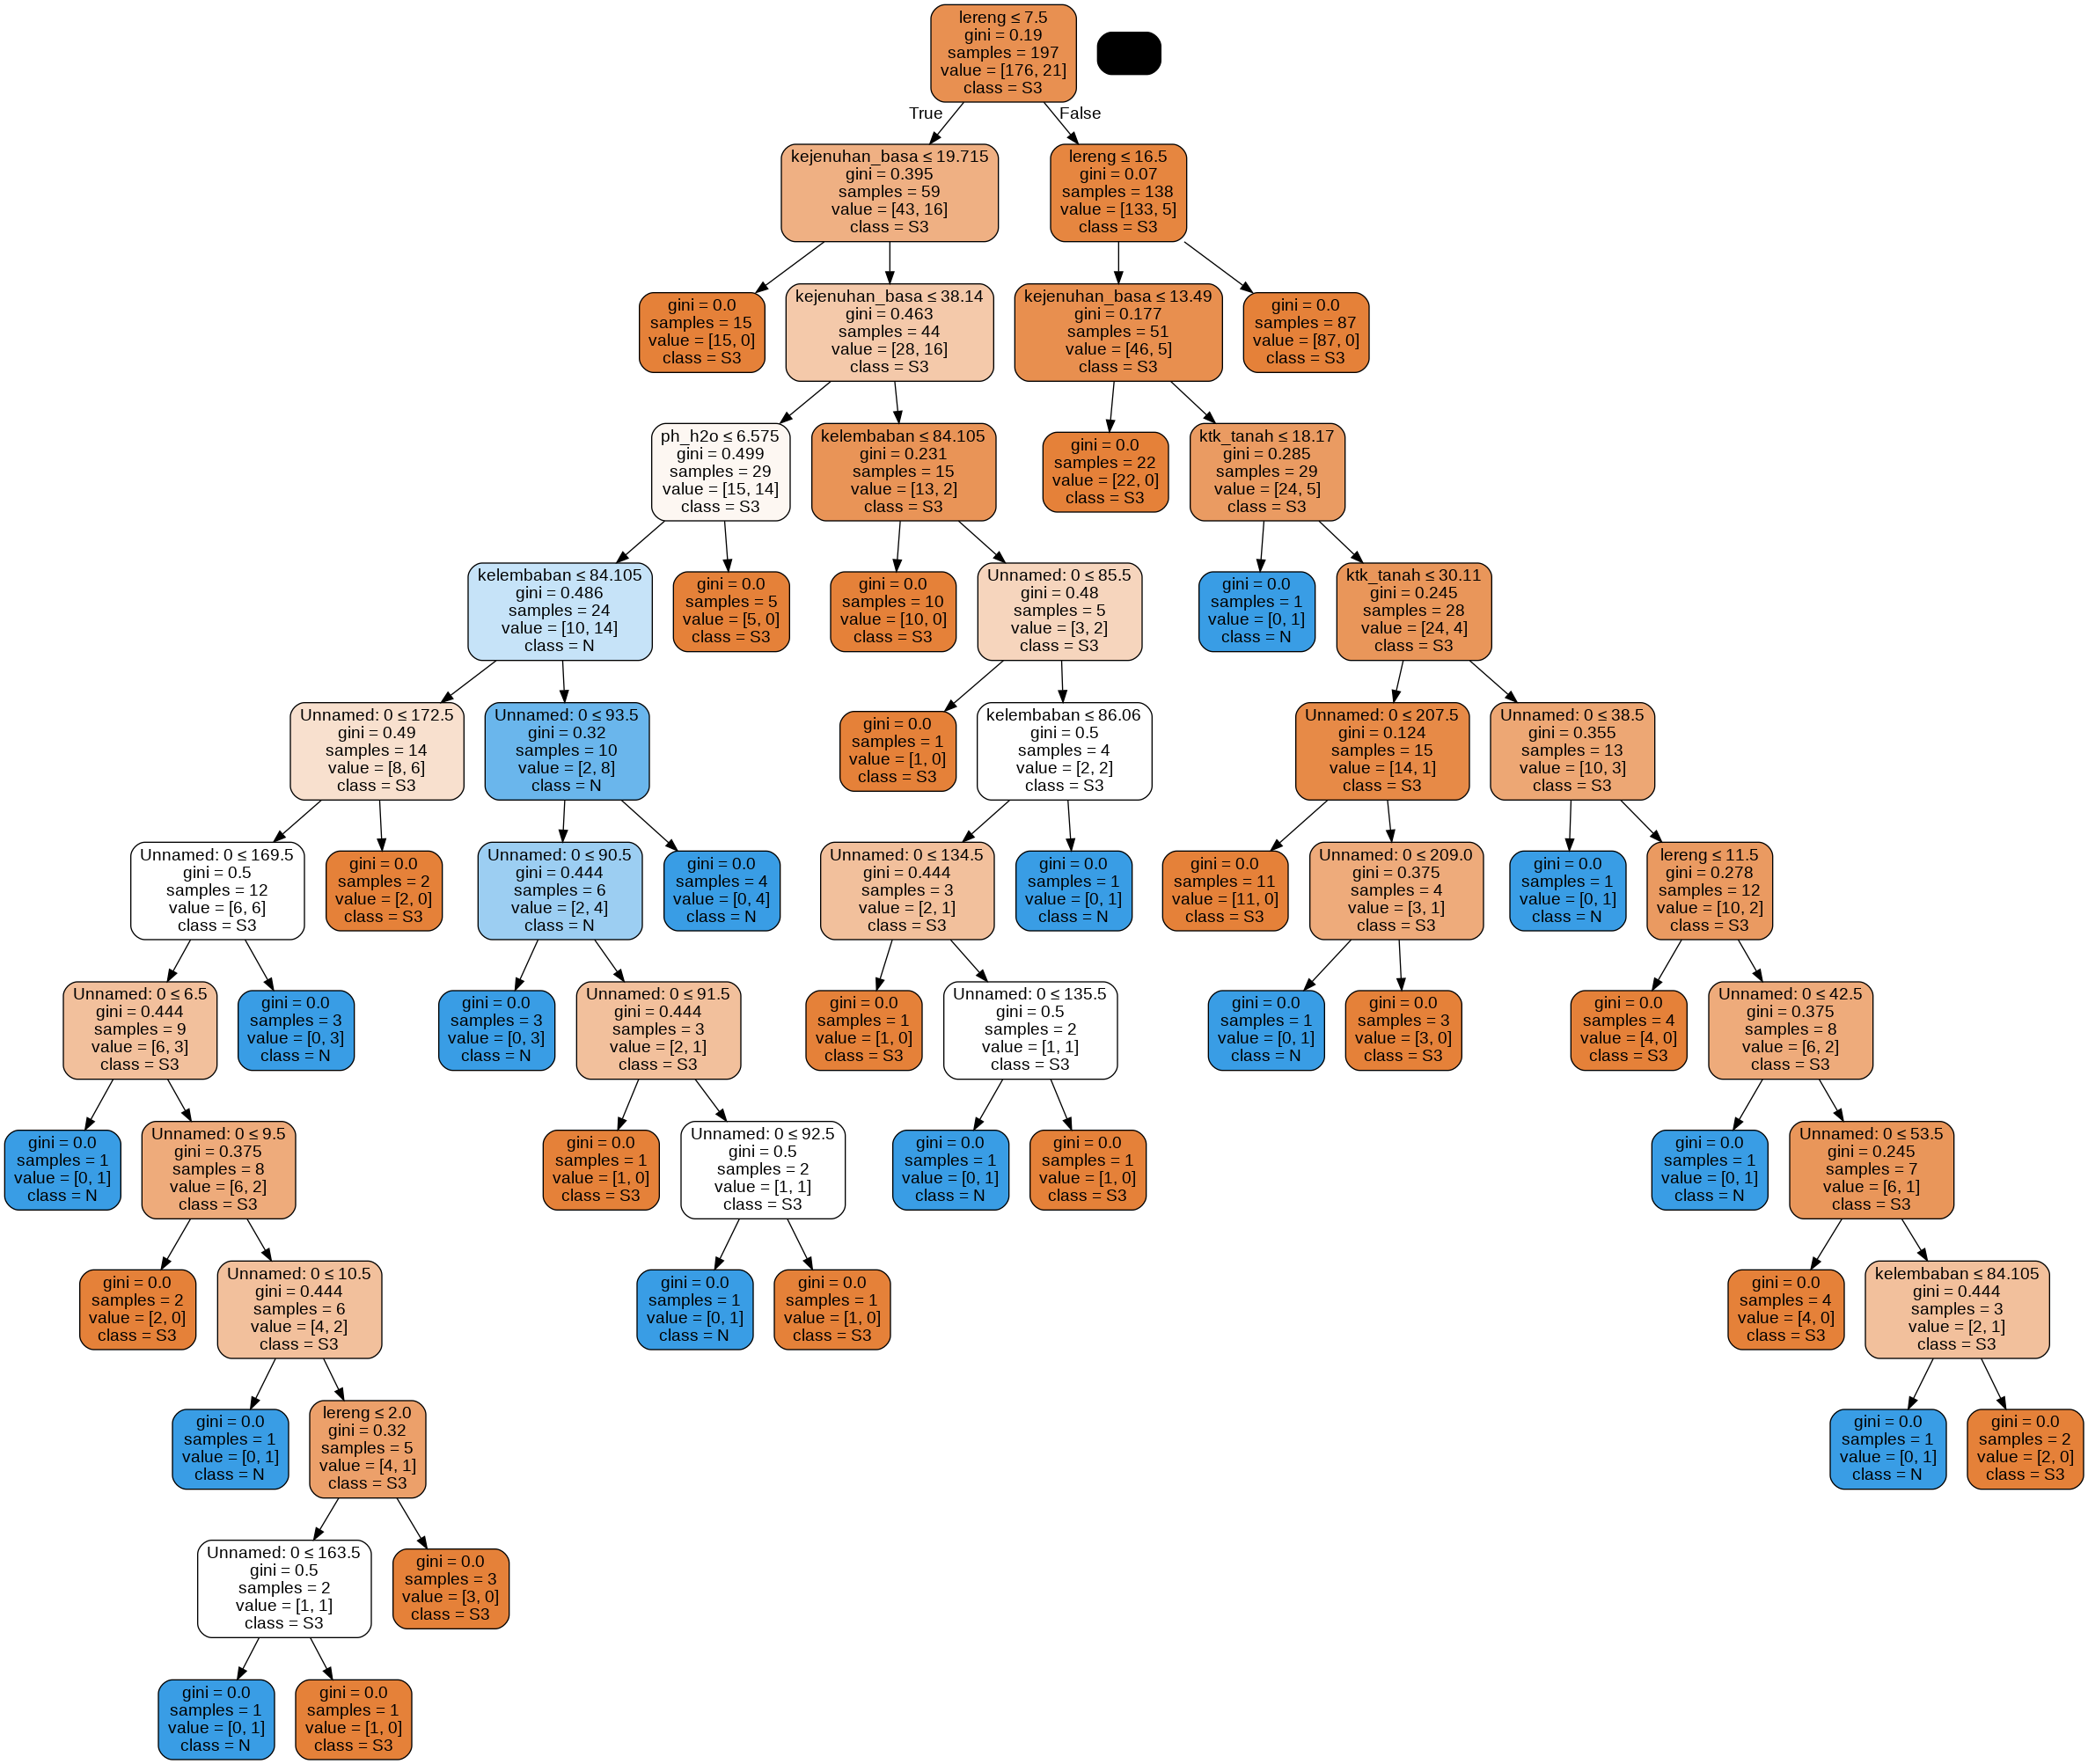

In [21]:
abc_cart(df).run_cart_abc()